In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/MyDrive/프로젝트 폴더/code/Sales_model/Data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/code/Sales_model/Data


In [12]:
%ls

data_out.csv  merged.csv


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [71]:
data = pd.read_csv('data_out.csv')            # 로그변환 -> 이상치 데이터 모두 제거
data.drop(columns = ['Unnamed: 0','상권코드'], inplace=True)
# 분기당 매출을 월매출로 생각하자!(1분기 : 3개월, 유사업종수로 나눔 까지 고려)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83674 entries, 0 to 83673
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   서비스업종코드명          83674 non-null  object 
 1   점포수               83674 non-null  float64
 2   유사업종점포수           83674 non-null  float64
 3   개업점포수             83674 non-null  float64
 4   폐업점포수             83674 non-null  float64
 5   집객시설수             83674 non-null  float64
 6   관공서수              83674 non-null  float64
 7   은행수               83674 non-null  float64
 8   버스정거장수            83674 non-null  float64
 9   지하철수              83674 non-null  float64
 10  약국수               83674 non-null  float64
 11  총직장인구수            83674 non-null  float64
 12  총상주인구수            83674 non-null  float64
 13  총_생활인구_수          83674 non-null  float64
 14  남성_생활인구_수         83674 non-null  float64
 15  여성_생활인구_수         83674 non-null  float64
 16  연령대_10_생활인구_수     83674 non-null  float6

In [73]:
data.describe()

,점포수,유사업종점포수,개업점포수,폐업점포수,집객시설수,관공서수,은행수,버스정거장수,지하철수,약국수,...,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,분기당매출금액
count,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.00000,83674.000000,83674.000000,...,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,83674.000000,8.367400e+04
mean,6.320799,8.005802,0.300727,0.303619,40.275450,1.102111,0.660098,6.04012,0.412577,4.254237,...,159589.409966,110559.736585,131036.062481,131815.679021,131959.332182,131911.779298,131554.435237,126129.202751,123534.455428,8.480251e+06
std,4.871310,5.763037,0.458577,0.459823,54.900189,1.623442,0.706120,6.94112,0.759508,5.440535,...,91075.128345,65533.003383,75524.226698,76110.552119,76150.086224,76132.810906,75796.952440,72665.796272,71950.783721,4.966158e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1274.000000,299.000000,967.000000,962.000000,1000.000000,990.000000,996.000000,1062.000000,838.000000,1.000000e+06
25%,2.000000,3.000000,0.000000,0.000000,11.000000,0.000000,0.000000,2.00000,0.000000,1.000000,...,78445.000000,51996.000000,64548.000000,64868.500000,64899.000000,64889.000000,64734.000000,61561.500000,59244.000000,3.960000e+06
50%,5.000000,6.000000,0.000000,0.000000,21.000000,1.000000,1.000000,4.00000,0.000000,2.000000,...,154449.000000,105573.000000,124140.500000,124652.500000,124833.000000,124611.000000,124278.000000,120864.000000,118159.500000,7.670000e+06
75%,12.000000,15.000000,1.000000,1.000000,48.000000,2.000000,1.000000,8.00000,1.000000,6.000000,...,264638.000000,183472.000000,218730.000000,220330.000000,220166.000000,220275.000000,219695.000000,208544.000000,204956.000000,1.416000e+07
max,13.500000,16.500000,1.000000,1.000000,593.000000,21.000000,2.000000,83.00000,5.000000,52.000000,...,276702.750000,196528.500000,228747.750000,230508.375000,230712.000000,230684.250000,229579.500000,220041.000000,217321.125000,1.530000e+07


In [74]:
# 매출의 단위를 만원단위로 조정(분기당매출금액이 아닌 월매출 금액임)
data['분기당매출금액'] = data['분기당매출금액']/10000
data['분기당매출금액']

0         962.0
1         569.0
2        1530.0
3        1530.0
4        1530.0
          ...  
83669     938.0
83670    1530.0
83671     442.0
83672     240.0
83673     351.0
Name: 분기당매출금액, Length: 83674, dtype: float64

In [75]:
data.columns

Index(['서비스업종코드명', '점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수',
       '버스정거장수', '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수',
       '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수',
       '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수',
       '시간대_6_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '시군구명'],
      dtype='object')

# 원핫 인코딩 시킨 데이터

In [76]:
# 자치구코드, 업종코드 원핫 인코딩(columns 2개 원핫 인코딩)
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_cat = ohe.fit_transform(data[['시군구명','서비스업종코드명']])

data = pd.concat([data.drop(columns=['시군구명','서비스업종코드명']),
           pd.DataFrame(train_cat, columns=[col for col in np.append(ohe.categories_[0],ohe.categories_[1])])], axis=1)

In [77]:
data.columns

Index(['점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수', '버스정거장수',
       '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수',
       '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
       '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '강남구', '강동구', '강북구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '분식전문점', '양식음식점', '육류판매', '일식음식점', '제과점', '중식음식점', '치킨전문점',
       '커피-음료', '패스트푸드점', '한식음식점', '호프-간이주점'],
      dtype='object')

# train test split

In [78]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
data = data.astype({'분기당매출금액': 'int'})
train = data[data.columns.difference(['분기당매출금액'])]
target = data[['분기당매출금액']]

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=True, random_state=2023)

In [80]:
x_train.columns

Index(['강남구', '강동구', '강북구', '강서구', '개업점포수', '관공서수', '관악구', '광진구', '구로구',
       '금요일_생활인구_수', '금천구', '남성_생활인구_수', '노원구', '도봉구', '동대문구', '동작구', '마포구',
       '목요일_생활인구_수', '버스정거장수', '분식전문점', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '수요일_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수',
       '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수', '약국수', '양식음식점', '양천구',
       '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '영등포구', '용산구',
       '월요일_생활인구_수', '유사업종점포수', '육류판매', '은평구', '은행수', '일식음식점', '일요일_생활인구_수',
       '점포수', '제과점', '종로구', '중구', '중랑구', '중식음식점', '지하철수', '집객시설수', '총_생활인구_수',
       '총상주인구수', '총직장인구수', '치킨전문점', '커피-음료', '토요일_생활인구_수', '패스트푸드점', '폐업점포수',
       '한식음식점', '호프-간이주점', '화요일_생활인구_수'],
      dtype='object')

# light GBM : 경량화된 수직적 결정트리구조 ( https://lightgbm.readthedocs.io/en/v3.3.2/)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import *
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

In [82]:
# kfold로 validation set 설정
folds = KFold(n_splits = 5, shuffle = True, random_state = 2023)

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)) :
    x_train, y_train = train.iloc[trn_idx], target.iloc[trn_idx] 
    x_valid, y_valid = train.iloc[val_idx], target.iloc[val_idx]

In [83]:
train_ds = lgb.Dataset(x_train, label = y_train) 
valid_ds = lgb.Dataset(x_valid, label = y_valid)
test_ds = lgb.Dataset(x_test, label = y_test) 

In [84]:
## Grid Search : lightgbm 파라미터 조정
# params_grid = {'learning_rate': [0.01,0.05,0.1], # 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수
#           'max_depth': [-1], # -1로 설정하면 제한없이 분기
#           'boosting': ['gbdt'], 
#           'objective': ['regression'], 
#           'min_data_in_leaf' : [150,200],
#           'metric': ['mse','rmse','r2'], 
#           'is_training_metric': [True], 
#           'num_leaves': [200,400,600], 
#           'feature_fraction': [0.9,], 
#           'bagging_fraction': [0.9], 
#           'bagging_freq': [5],
#           'seed':[2018]
#           }

'''
{'bagging_fraction': 0.8,
 'bagging_freq': 5,
 'boosting': 'gbdt',
 'feature_fraction': 1.0,
 'is_training_metric': True,
 'learning_rate': 0.2,
 'max_depth': 25,
 'metric': 'mse',
 'min_data_in_leaf': 15,
 'num_leaves': 100,
 'objective': 'regression',
 'seed': 2018}
  {'bagging_fraction': 0.9,
 'bagging_freq': 5,
 'boosting': 'gbdt',
 'feature_fraction': 0.9,
 'is_training_metric': True,
 'learning_rate': 0.33,
 'max_depth': -1,
 'metric': 'mse',
 'min_data_in_leaf': 50,
 'num_leaves': 200,
 'objective': 'regression',
 'seed': 2018}
 '''

"\n{'bagging_fraction': 0.8,\n 'bagging_freq': 5,\n 'boosting': 'gbdt',\n 'feature_fraction': 1.0,\n 'is_training_metric': True,\n 'learning_rate': 0.2,\n 'max_depth': 25,\n 'metric': 'mse',\n 'min_data_in_leaf': 15,\n 'num_leaves': 100,\n 'objective': 'regression',\n 'seed': 2018}\n  {'bagging_fraction': 0.9,\n 'bagging_freq': 5,\n 'boosting': 'gbdt',\n 'feature_fraction': 0.9,\n 'is_training_metric': True,\n 'learning_rate': 0.33,\n 'max_depth': -1,\n 'metric': 'mse',\n 'min_data_in_leaf': 50,\n 'num_leaves': 200,\n 'objective': 'regression',\n 'seed': 2018}\n "

In [85]:
# grid_search = GridSearchCV(LGBMRegressor(), params_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_search.fit(x_train, y_train)


```
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
```

In [86]:
best_params_ = {'bagging_fraction': 0.8,
                'bagging_freq': 5,
                'boosting': 'gbdt',
                'feature_fraction': 1.0,
                'is_training_metric': True,
                'learning_rate': 0.2,
                'max_depth': 25,
                'metric': 'mse',
                'min_data_in_leaf': 15,
                'num_leaves': 100,
                'objective': 'regression',
                'seed': 2018}

In [87]:
model = lgb.train(best_params_, train_ds, 1000, valid_ds, verbose_eval=100, early_stopping_rounds=50)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6518
[LightGBM] [Info] Number of data points in the train set: 66940, number of used features: 70
[LightGBM] [Info] Start training from score 847.275739
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 116946
[200]	valid_0's l2: 104567
[300]	valid_0's l2: 98591
[400]	valid_0's l2: 94817.2
[500]	valid_0's l2: 92729.4
[600]	valid_0's l2: 90783.4
[700]	valid_0's l2: 89276.9
[800]	valid_0's l2: 88342.5
[900]	valid_0's l2: 87680.9
[1000]	valid_0's l2: 87359.6
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 87359.6


In [88]:
predict_test = np.round(model.predict(x_test))

In [89]:
# 에러 측정
mse = mean_squared_error(y_test, predict_test)
# 모델 정확도 측정
r2 = r2_score(y_test, predict_test)
acc = explained_variance_score(y_test, predict_test)

In [90]:
print('Mean squared error: ', mse)
print('R2 score: ', r2)
print(acc)

Mean squared error:  10775.50146399761
R2 score:  0.9563549180304346
0.9563554364303312


In [91]:
# 매출의 실제값, 예측값 비교
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)

In [92]:
final_result.to_csv('매출비교.csv')

In [93]:
print('Root Mean Squared Error : ',np.sqrt(np.sum(np.power(final_result['분기당매출금액']-final_result[0],2))/len(final_result)))

Root Mean Squared Error :  103.80511289911307


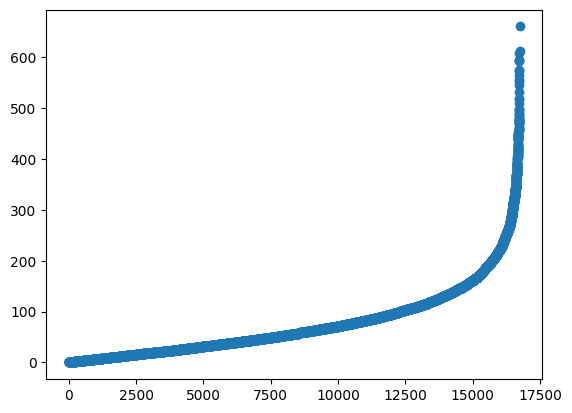

In [94]:
# Residual을 크기별로 정렬한 결과
k = np.sort(abs(final_result['분기당매출금액']-final_result[0]))
plt.scatter(np.arange(len(final_result)),k)

In [95]:
%ls

data_out.csv  merged.csv  model_reg.pkl  result.csv  매출비교.csv


In [96]:
import pickle
file = 'model_reg.pkl'
pickle.dump(model, open(file, 'wb'))
print('Trained LGB model was saved!')

Trained LGB model was saved!


# 월예상매출 (2022년 4분기 데이터 기반)

In [97]:
test_pd = pd.read_csv('result.csv')

In [98]:
np.sort(test_pd.columns)

array(['Unnamed: 0', '개업점포수', '관공서수', '금요일_생활인구_수', '남성_생활인구_수',
       '목요일_생활인구_수', '버스정거장수', '분기당매출금액', '상권코드', '서비스업종코드명',
       '수요일_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수',
       '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수', '시군구명', '약국수',
       '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '월요일_생활인구_수',
       '유사업종점포수', '은행수', '일요일_생활인구_수', '점포수', '지하철수', '집객시설수', '총_생활인구_수',
       '총상주인구수', '총직장인구수', '토요일_생활인구_수', '폐업점포수', '화요일_생활인구_수'],
      dtype=object)



```
Index(['강남구', '강동구', '강북구', '강서구', '개업점포수', '관공서수', '관악구', '광진구', '구로구',
       '금요일_생활인구_수', '금천구', '남성_생활인구_수', '노원구', '도봉구', '동대문구', '동작구', '마포구',
       '목요일_생활인구_수', '버스정거장수', '분식전문점', '상권코드', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '수요일_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수',
       '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수', '약국수', '양식음식점', '양천구',
       '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '영등포구', '용산구',
       '월요일_생활인구_수', '유사업종점포수', '육류판매', '은평구', '은행수', '일식음식점', '일요일_생활인구_수',
       '점포수', '제과점', '종로구', '중구', '중랑구', '중식음식점', '지하철수', '집객시설수', '총_생활인구_수',
       '총상주인구수', '총직장인구수', '치킨전문점', '커피-음료', '토요일_생활인구_수', '패스트푸드점', '폐업점포수',
       '한식음식점', '호프-간이주점', '화요일_생활인구_수'],
      dtype='object')
```



In [99]:
test_pd.drop(columns=['Unnamed: 0'],inplace=True)

In [100]:
train_cat = ohe.fit_transform(test_pd[['시군구명','서비스업종코드명']])
test_pd = pd.concat([test_pd.drop(columns=['시군구명','서비스업종코드명']), pd.DataFrame(train_cat, columns=[col for col in np.append(ohe.categories_[0],ohe.categories_[1])])], axis=1)
# test_pd.drop(columns=['개업율','폐업율'],inplace=True)

a = model.predict(test_pd.drop(columns=['분기당매출금액','상권코드']))
inverse = ohe.inverse_transform(test_pd.iloc[:,36:72])
test_pd.drop(columns=test_pd.iloc[:,36:72].columns.tolist(),inplace=True)

In [101]:
test_pd.drop(columns=test_pd.iloc[:,36:72].columns.tolist(),inplace=True)

In [102]:
test_pd['시군구명'] = inverse[:,0]
test_pd['서비스업종명'] = inverse[:,1]
test_pd['월예상매출'] = np.round(a)
test_pd.columns

Index(['상권코드', '점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수',
       '버스정거장수', '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수',
       '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수',
       '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수',
       '시간대_6_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '시군구명', '서비스업종명',
       '월예상매출'],
      dtype='object')

In [103]:
result = test_pd[['상권코드','시군구명','서비스업종명','월예상매출']]

In [104]:
# 점수를 위해 월예상매출을 평균을 60점으로 한 표준점수로 부여함.(정규분포는 아니지만 모델이 확장되면 정규분포의 형태를 예상함)
scaler = StandardScaler()
a = scaler.fit_transform(result[['월예상매출']])

In [105]:
a = 60+10*a

In [106]:
a = np.round(a,2)

In [107]:
result['점수'] = a

In [108]:
result

,상권코드,시군구명,서비스업종명,월예상매출,점수
0,2110118,성동구,커피-음료,839.0,53.09
1,2120087,은평구,제과점,819.0,52.57
2,2120087,은평구,치킨전문점,929.0,55.43
3,2120087,은평구,패스트푸드점,865.0,53.77
4,2120087,은평구,커피-음료,1273.0,64.36
...,...,...,...,...,...
3339,2110734,금천구,한식음식점,498.0,44.24
3340,2110922,서초구,커피-음료,1131.0,60.68
3341,2110841,동작구,육류판매,1238.0,63.46
3342,2110761,영등포구,한식음식점,730.0,50.26


In [109]:
%ls

data_out.csv  merged.csv  model_reg.pkl  result.csv  매출비교.csv


In [111]:
result.to_csv('회귀_예상매출.csv', encoding='utf-8-sig')